## Tests the visicalc interpolator

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")
import imcurio.visicalc as vc
import matplotlib.pyplot as plt

In [29]:
## Let's make a mapw with a single source with some fringes
v,x,y = vc.rfft2_real_coords(128,0.1)
rmap=np.zeros((128,128),float)
rmap[8,2]=1

In [30]:
%autoreload
V=vc.VisiCalc(rmap,0.1,vc.SimplestGaussBeam(2))
## in purpose we have a u-v track that crosses signs as this is is sually the hard bit
u=np.linspace(-V.df*10.1,V.df*5.1,100)
v=np.linspace(-V.df*15.1,V.df*35.1,100)

In [31]:
vis=V.visibility(u,v,interpolation='lin')
vis2=V.visibility(u,v,interpolation='lasz')


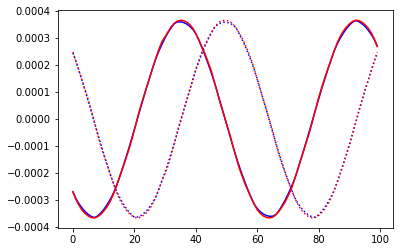

In [32]:
plt.plot(np.arange(100),np.real(vis),'b:')
plt.plot(np.arange(100),np.real(vis2),'r:')
plt.plot(np.arange(100),np.imag(vis),'b-')
plt.plot(np.arange(100),np.imag(vis2),'r-')

In [37]:
u=np.linspace(-V.df*50.1,V.df*55.1,512)
v=np.linspace(-V.df*55.1,V.df*55.1,512)
visx=V.visibility(u,v,interpolation='lasz',opts={'a':3.5})

[]

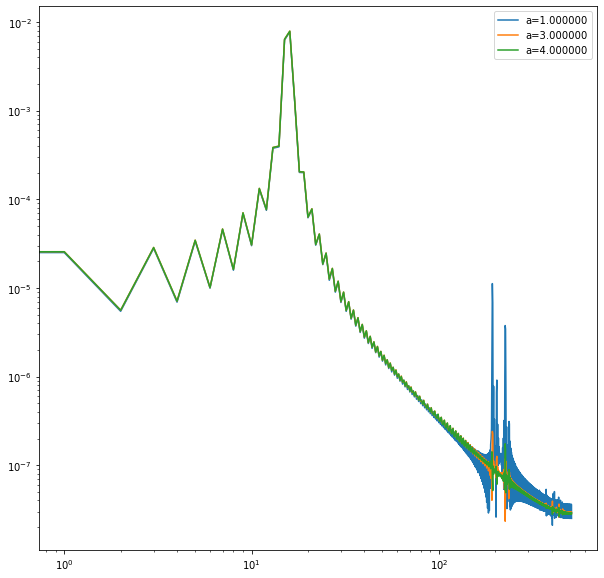

In [64]:
from numpy.fft import rfft
plt.figure(figsize=(10,10))
for la in [1,3.0,4.0]:#0,1,1.5,2,2.5,3,3.5]:
    if la>0:
        visx=V.visibility(u,v,interpolation='lasz',opts={'a':la})
    else:
        visx=V.visibility(u,v,interpolation='lin')    
    ps = (abs(rfft(np.hstack((np.imag(visx),np.zeros(len(visx),float)))))**2)[1:]
    plt.plot (ps,label='a=%f'%la)
plt.legend()
#plt.xlim(150,350)
plt.loglog()
    
          